In [18]:
import os
import numpy as np
import pandas as pd
import cv2

In [19]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import os
import matplotlib.pyplot as plt


In [20]:
train_path ='/content/seed/'
valid_path = '/content/test_seed/'

In [21]:
len(os.listdir(train_path))

12

In [22]:
for i in os.listdir(train_path):
    print("No of Images in ",i," category is ",len(os.listdir(os.path.join(train_path,i))))

No of Images in  arecaceae  category is  12
No of Images in  urachloa  category is  12
No of Images in  dipteryx  category is  12
No of Images in  syagrus  category is  13
No of Images in  eucalipto  category is  12
No of Images in  cecropeia  category is  12
No of Images in  .ipynb_checkpoints  category is  0
No of Images in  matayba  category is  12
No of Images in  protium  category is  12
No of Images in  mabea  category is  12
No of Images in  myrcia  category is  12
No of Images in  anadenanthera  category is  12


In [23]:
import shutil
shutil.rmtree('/content/seed/.ipynb_checkpoints')

In [24]:
for i in os.listdir(train_path):
    print("No of Images in ",i," category is ",len(os.listdir(os.path.join(train_path,i))))

No of Images in  arecaceae  category is  12
No of Images in  urachloa  category is  12
No of Images in  dipteryx  category is  12
No of Images in  syagrus  category is  13
No of Images in  eucalipto  category is  12
No of Images in  cecropeia  category is  12
No of Images in  matayba  category is  12
No of Images in  protium  category is  12
No of Images in  mabea  category is  12
No of Images in  myrcia  category is  12
No of Images in  anadenanthera  category is  12


In [25]:
for i in os.listdir(valid_path):
    print("No of Images in ",i," category is ",len(os.listdir(os.path.join(valid_path,i))))

No of Images in  test_arecaceae  category is  4
No of Images in  test_mabea  category is  4
No of Images in  test_cecropeia  category is  4
No of Images in  test_syagrus  category is  4
No of Images in  test_myrcia  category is  4
No of Images in  test_dipteryx  category is  4
No of Images in  .ipynb_checkpoints  category is  0
No of Images in  test_protium  category is  4
No of Images in  test_matayba  category is  4
No of Images in  test_eucalipto  category is  4
No of Images in  test_anadenanthera  category is  4
No of Images in  test_urachloa  category is  4


In [26]:
import shutil
shutil.rmtree('/content/test_seed/.ipynb_checkpoints')


In [27]:
for i in os.listdir(valid_path):
    print("No of Images in ",i," category is ",len(os.listdir(os.path.join(valid_path,i))))

No of Images in  test_arecaceae  category is  4
No of Images in  test_mabea  category is  4
No of Images in  test_cecropeia  category is  4
No of Images in  test_syagrus  category is  4
No of Images in  test_myrcia  category is  4
No of Images in  test_dipteryx  category is  4
No of Images in  test_protium  category is  4
No of Images in  test_matayba  category is  4
No of Images in  test_eucalipto  category is  4
No of Images in  test_anadenanthera  category is  4
No of Images in  test_urachloa  category is  4


In [29]:
image_files = glob(train_path + '/*/*.jp*g')
valid_image_files = glob(valid_path + '/*/*.jp*g')

In [30]:
len(image_files)

132

In [31]:
len(valid_image_files)

44

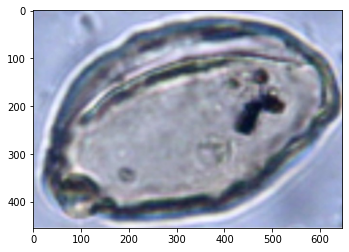

In [37]:
plt.imshow(image.img_to_array(image.load_img(np.random.choice(image_files))).astype('uint8'))
plt.show()

In [38]:
IMAGE_SIZE = [100, 100]


In [39]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [40]:
for layer in vgg16.layers:
    layer.trainable = False

In [41]:
folders = glob('/content/seed/*')

In [42]:
folders

['/content/seed/arecaceae',
 '/content/seed/urachloa',
 '/content/seed/dipteryx',
 '/content/seed/syagrus',
 '/content/seed/eucalipto',
 '/content/seed/cecropeia',
 '/content/seed/matayba',
 '/content/seed/protium',
 '/content/seed/mabea',
 '/content/seed/myrcia',
 '/content/seed/anadenanthera']

In [43]:
test_folders = glob('/content/test_seed/*')

In [44]:
len(folders)

11

In [45]:
len(test_folders)

11

In [72]:
x = Flatten()(vgg16.output)
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg16.input, outputs=prediction)

model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0   

In [73]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [75]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (100, 100),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 132 images belonging to 11 classes.


In [76]:
valid_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (100, 100),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 44 images belonging to 11 classes.


In [77]:
print(valid_set.class_indices)

{'test_anadenanthera': 0, 'test_arecaceae': 1, 'test_cecropeia': 2, 'test_dipteryx': 3, 'test_eucalipto': 4, 'test_mabea': 5, 'test_matayba': 6, 'test_myrcia': 7, 'test_protium': 8, 'test_syagrus': 9, 'test_urachloa': 10}


In [78]:
r = model.fit_generator(
  training_set,
  validation_data=valid_set,
  epochs=25)


Epoch 1/25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


5/5 [==============================] - 2s 213ms/step - loss: 2.5082 - accuracy: 0.1212 - val_loss: 2.1932 - val_accuracy: 0.2500
Epoch 2/25
5/5 [==============================] - 1s 148ms/step - loss: 1.9795 - accuracy: 0.3788 - val_loss: 1.7203 - val_accuracy: 0.4318
Epoch 3/25
5/5 [==============================] - 1s 152ms/step - loss: 1.5181 - accuracy: 0.6364 - val_loss: 1.4710 - val_accuracy: 0.5000
Epoch 4/25
5/5 [==============================] - 1s 140ms/step - loss: 1.1679 - accuracy: 0.7576 - val_loss: 1.2958 - val_accuracy: 0.5909
Epoch 5/25
5/5 [==============================] - 1s 139ms/step - loss: 1.0248 - accuracy: 0.7803 - val_loss: 1.1781 - val_accuracy: 0.6591
Epoch 6/25
5/5 [==============================] - 1s 171ms/step - loss: 0.8816 - accuracy: 0.8636 - val_loss: 1.1538 - val_accuracy: 0.6364
Epoch 7/25
5/5 [==============================] - 1s 148ms/step - loss: 0.7453 - accuracy: 0.8485 - val_loss: 1.0958 - val_accuracy: 0.6591
Epoch 8/25
5/5 [===============

Got 99% accuracy on training dataset and 72% accuracy on testing dataset with VGGnet

**Plotting Loss and Accuracy**

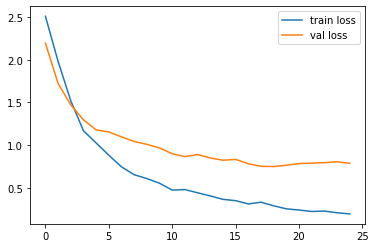

In [79]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

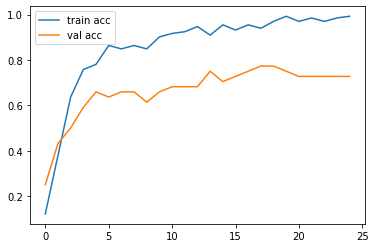

In [80]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()